## 1. Importing libraries & Dataset

In [1231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [1232]:
pd.set_option('display.max_columns', None)

In [1233]:
leadscore = pd.read_csv("Leads.csv")
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1234]:
leadscore.shape

(9240, 37)

In [1235]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1236]:
leadscore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Data cleansing

In [1237]:
# 2a. Identification of columns that contain the word "Select"
obj_cols = leadscore.select_dtypes(include = 'object')
s = lambda x: x.str.contains('Select', na=False)
l = obj_cols.columns[obj_cols.apply(s).any()].tolist()
print (l)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [1238]:
# Replacing "Select" with NaN for all columns
sel_cols = ['How did you hear about X Education', 'Lead Profile', 'City', 'Specialization']
leadscore[sel_cols] = leadscore[sel_cols].replace('Select', np.NaN)

In [1239]:
# 2b. Removing null values which are greater than 45%
nl_val = leadscore.isnull().sum().sort_values(ascending = False)
nl_val = round(((nl_val/len(leadscore))*100),2)
nl_val

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [1240]:
# Removing the missing values with more than 40%
cols = leadscore.columns

for i in cols:
    if((100*leadscore[i].isnull().sum()/len(leadscore.index)) >= 40):
        leadscore.drop(i, axis = 1, inplace = True)

In [1241]:
leadscore = leadscore.drop(['Prospect ID'], axis = 1)

In [1242]:
# Using this for Lead Score at the end of the notebook
Lead_Number = leadscore['Lead Number']

In [1243]:
# 2c. Renaming columns which has long header and converting into lower case
leadscore.rename(columns={'What matters most to you in choosing a course': 'Course selection', 
                          'What is your current occupation': 'Occupation', 'I agree to pay the amount through cheque': 'Cheque Payment',
                          'A free copy of Mastering The Interview': 'Free Copy', 'Update me on Supply Chain Content': 'Update on SCM',
                          'Receive More Updates About Our Courses': 'Course Updates'},inplace = True)

In [1244]:
leadscore.shape

(9240, 29)

## 3. Null value treatment of Categorical & Continuous variables

#### 3a. Imputing of 'What matters most to you in choosing a course'

In [1245]:
leadscore['Course selection'].value_counts(dropna = False, normalize = True)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: Course selection, dtype: float64

In [1246]:
# Replacing NaN with Better Career Prospects since that constitutes 70% of data
leadscore['Course selection'] = leadscore['Course selection'].replace(np.nan,'Better Career Prospects')

In [1247]:
leadscore['Course selection'].value_counts(dropna = False, normalize = True)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: Course selection, dtype: float64

In [1248]:
# As the data is skewed towards one category value, the column will be dropped
leadscore.drop(['Course selection'], axis = 1, inplace = True)

#### 3b. Imputing of 'What is your current occupation'

In [1249]:
leadscore['Occupation'].value_counts(dropna = False, normalize = True)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: Occupation, dtype: float64

In [1250]:
# Replacing NaN with Unemployed since that constitutes 70% of data
leadscore['Occupation'] = leadscore['Occupation'].replace(np.nan,'Unemployed')

In [1251]:
# combining Businessman with Working Professional
leadscore['Occupation'] = leadscore['Occupation'].replace(['Businessman'], 'Working Professional')

In [1252]:
leadscore['Occupation'].value_counts(dropna = False, normalize = True)*100

Unemployed              89.718615
Working Professional     7.727273
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Name: Occupation, dtype: float64

#### 3c. Imputing of 'Country'

In [1253]:
# Replacing NaN with India since that constitutes 70% of data
leadscore['Country'] = leadscore['Country'].replace(np.nan,'India')

In [1254]:
leadscore['Country'].value_counts(dropna = False, normalize = True)*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

In [1255]:
# Dropping "country" column as we can see that the leads are mostly from India. This will not impact model building.
leadscore.drop(['Country'],axis = 1, inplace = True)

#### 3d. Analysis of 'Specialization'

In [1256]:
leadscore['Specialization'].value_counts(dropna = False, normalize = True)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [1257]:
# We cannot impute NaN with any of these specializations. Hence, a new category will be created to replace the Null values
leadscore['Specialization'] = leadscore['Specialization'].replace(np.nan, 'category not specified')

In [1258]:
# Combining all the management related specializations
leadscore['Specialization'] = leadscore['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

In [1259]:
leadscore['Specialization'].value_counts(dropna = False, normalize = True)*100

Management_Specializations           46.028139
category not specified               36.580087
Business Administration               4.361472
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
E-COMMERCE                            1.212121
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### 3e. Analysis of 'Tags'

In [1260]:
leadscore['Tags'] = leadscore['Tags'].replace(np.nan, 'category not specified')

In [1261]:
# Combining all the tags with low frequency category by calling as "Other Tags"
leadscore['Tags'] = leadscore['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                       'invalid number','wrong number given','Interested  in full time MBA'], 'Other Tags')

In [1262]:
leadscore['Tags'].value_counts(dropna = False, normalize = True)*100

category not specified                 36.287879
Will revert after reading the email    22.424242
Other Tags                             14.935065
Ringing                                13.019481
Interested in other courses             5.551948
Closed by Horizzon                      3.874459
Busy                                    2.012987
Lost to EINS                            1.893939
Name: Tags, dtype: float64

#### 3f. Imputing of 'City'

In [1263]:
leadscore['City'] = leadscore['City'].replace(np.nan,'Mumbai')

In [1264]:
leadscore['City'].value_counts(dropna = False, normalize = True)*100

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

#### 3g. Imputing of 'Lead Source'

In [1265]:
# NaN & 'google' values will be replaced with Google.
leadscore['Lead Source'] = leadscore['Lead Source'].replace(np.nan,'Google')
leadscore['Lead Source'] = leadscore['Lead Source'].replace('google','Google')

In [1266]:
leadscore['Lead Source'] = leadscore['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Other source')

In [1267]:
leadscore['Lead Source'] = leadscore['Lead Source'].replace(['Facebook'],'Social Media')

In [1268]:
leadscore['Lead Source'].value_counts(normalize = True, dropna = False)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Social Media         0.616883
Other source         0.205628
Live Chat            0.021645
Name: Lead Source, dtype: float64

#### 3h. Imputing Last Activity

In [1269]:
leadscore['Last Activity'].value_counts(normalize = True, dropna = False)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [1270]:
# Combining all the low frequency activities into a new category called Others
# Imputing Null values into Others Category
leadscore['Last Activity'] = leadscore['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                        'View in browser link Clicked', 'Email Marked Spam','Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')
leadscore['Last Activity'] = leadscore['Last Activity'].replace(np.nan, 'Others')

In [1271]:
leadscore['Last Activity'].value_counts(normalize = True, dropna = False)*100

Email Opened                 37.196970
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Others                        3.333333
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

#### 3i. Imputing Last Notable Activity

In [1272]:
leadscore['Last Notable Activity'].value_counts(normalize = True, dropna = False)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [1273]:
leadscore['Last Notable Activity'] = leadscore['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                         'Unreachable','Unsubscribed','Email Bounced',                                                                    
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website', 
                                                                       'Email Received'],'Other Notable Activity')

In [1274]:
leadscore['Last Notable Activity'].value_counts(normalize = True, dropna = False)*100

Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
Page Visited on Website     3.441558
Olark Chat Conversation     1.980519
Email Link Clicked          1.872294
Other Notable Activity      1.731602
Name: Last Notable Activity, dtype: float64

#### 3j. Imputing of Total visits & Page views per visit

In [1275]:
leadscore['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [1276]:
# As we can observe the outlier, Imputing the null values with median
leadscore['TotalVisits'].replace(np.NaN, leadscore['TotalVisits'].median(), inplace=True)

In [1277]:
leadscore['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [1278]:
leadscore['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [1279]:
# As we can observe the outlier, Imputing the null values with median
leadscore['Page Views Per Visit'].replace(np.NaN, leadscore['Page Views Per Visit'].median(), inplace=True)

In [1280]:
leadscore['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [1281]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Number                  9240 non-null   int64  
 1   Lead Origin                  9240 non-null   object 
 2   Lead Source                  9240 non-null   object 
 3   Do Not Email                 9240 non-null   object 
 4   Do Not Call                  9240 non-null   object 
 5   Converted                    9240 non-null   int64  
 6   TotalVisits                  9240 non-null   float64
 7   Total Time Spent on Website  9240 non-null   int64  
 8   Page Views Per Visit         9240 non-null   float64
 9   Last Activity                9240 non-null   object 
 10  Specialization               9240 non-null   object 
 11  Occupation                   9240 non-null   object 
 12  Search                       9240 non-null   object 
 13  Magazine          

## 4. EDA

#### 4.1 identification and removal of Imbalanced variables

In [1282]:
leadscore['Do Not Call'].value_counts(normalize = True)*100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [1283]:
leadscore['Search'].value_counts(normalize = True)*100

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [1284]:
leadscore['Magazine'].value_counts(normalize = True)*100

No    100.0
Name: Magazine, dtype: float64

In [1285]:
leadscore['Newspaper Article'].value_counts(normalize = True)*100

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [1286]:
leadscore['X Education Forums'].value_counts(normalize = True)*100

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [1287]:
leadscore['Newspaper'].value_counts(normalize = True)*100

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [1288]:
leadscore['Digital Advertisement'].value_counts(normalize = True)*100

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [1289]:
leadscore['Through Recommendations'].value_counts(normalize = True)*100

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [1290]:
leadscore['Course Updates'].value_counts(normalize = True)*100

No    100.0
Name: Course Updates, dtype: float64

In [1291]:
leadscore['Update on SCM'].value_counts(normalize = True)*100

No    100.0
Name: Update on SCM, dtype: float64

In [1292]:
leadscore['Get updates on DM Content'].value_counts(normalize = True)*100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [1293]:
leadscore['Cheque Payment'].value_counts(normalize = True)*100

No    100.0
Name: Cheque Payment, dtype: float64

#### Insight
All these 12 columns which either has only one category value or two category values (in which one of the value >99%) will be dropped since it will not impact the model building.

In [1294]:
cols_to_drop = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums','Newspaper', 'Digital Advertisement',
               'Through Recommendations', 'Course Updates', 'Update on SCM', 'Get updates on DM Content', 'Cheque Payment']

In [1295]:
leadscore.drop(cols_to_drop, axis = 1, inplace = True)

In [1296]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Number                  9240 non-null   int64  
 1   Lead Origin                  9240 non-null   object 
 2   Lead Source                  9240 non-null   object 
 3   Do Not Email                 9240 non-null   object 
 4   Converted                    9240 non-null   int64  
 5   TotalVisits                  9240 non-null   float64
 6   Total Time Spent on Website  9240 non-null   int64  
 7   Page Views Per Visit         9240 non-null   float64
 8   Last Activity                9240 non-null   object 
 9   Specialization               9240 non-null   object 
 10  Occupation                   9240 non-null   object 
 11  Tags                         9240 non-null   object 
 12  City                         9240 non-null   object 
 13  Free Copy         

#### 4b. Data Imbalance check for Target variable

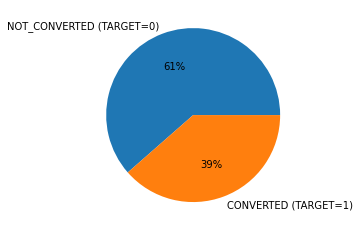

In [1297]:
plt.figure(figsize=(10,4))
plt.pie(leadscore['Converted'].value_counts(normalize=True)*100,labels=['NOT_CONVERTED (TARGET=0)','CONVERTED (TARGET=1)'], autopct='%.0f%%')
plt.show()

#### Insight
The target variable is not skewed and it looks balanced

#### 4c. Analysis of continuous variables

#### 4c(i) totalvisits

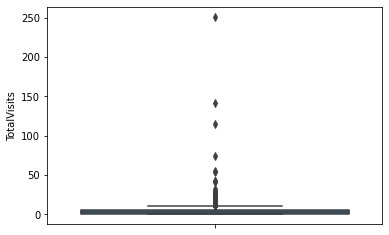

In [1298]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leadscore['TotalVisits'])
plt.show()

In [1299]:
leadscore['TotalVisits'].describe(percentiles=[0.1,.25, .50, .75,.90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

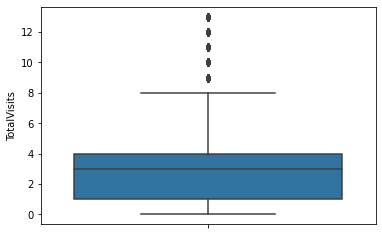

In [1300]:
# Outlier treatment - Removal of top(Q3) & bottom(Q1) 2% of the Column Outlier values
Q3 = leadscore.TotalVisits.quantile(0.98)
leadscore = leadscore[(leadscore.TotalVisits <= Q3)]

Q1 = leadscore.TotalVisits.quantile(0.02)
leadscore = leadscore[(leadscore.TotalVisits >= Q1)]
sns.boxplot(y=leadscore['TotalVisits'])
plt.show()

#### 4c(ii) Page Views per Visit

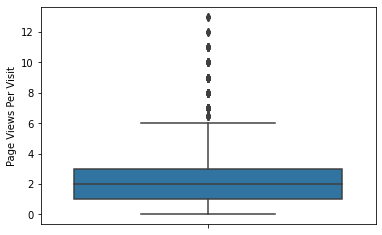

In [1301]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leadscore['Page Views Per Visit'])
plt.show()

In [1302]:
leadscore['Page Views Per Visit'].describe(percentiles=[0.1,.25, .50, .75,.90, .95, .99])

count    9066.000000
mean        2.298612
std         1.979081
min         0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

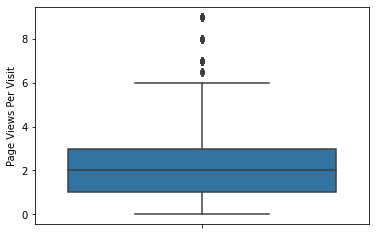

In [1303]:
# Outlier treatment - Removal of top(Q3) & bottom(Q1) 1% of the Column Outlier values
Q3 = leadscore['Page Views Per Visit'].quantile(0.99)
leadscore = leadscore[(leadscore['Page Views Per Visit'] <= Q3)]

Q1 = leadscore['Page Views Per Visit'].quantile(0.0)
leadscore = leadscore[(leadscore['Page Views Per Visit'] >= Q1)]
sns.boxplot(y=leadscore['Page Views Per Visit'])
plt.show()

#### 4c(iii) Total Time Spent on Website

In [1304]:
leadscore['Total Time Spent on Website'].describe(percentiles=[0.1,.25, .50, .75,.90, .95, .99])

count    9015.000000
mean      481.554187
std       546.372743
min         0.000000
10%         0.000000
25%         7.000000
50%       243.000000
75%       923.500000
90%      1375.000000
95%      1557.300000
99%      1839.860000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

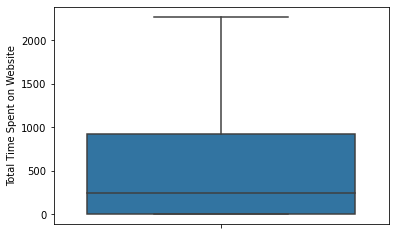

In [1305]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leadscore['Total Time Spent on Website'])
plt.show()

###### Insight
Since there are no major Outliers for 'Total Time Spent on Website', there will be NO Outlier Treatment

#### 4d. Analysis of Continuous variables VS Target variable

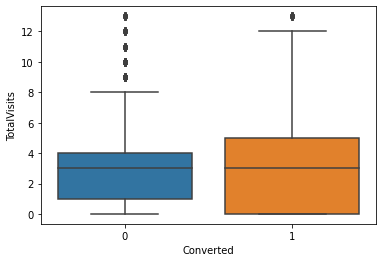

In [1306]:
#4d(i) "TotalVisits" VS "Converted"
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leadscore)
plt.show()

#### Insight
As the median of not-converted (0) and converted (1) are same, nothing can be correlated

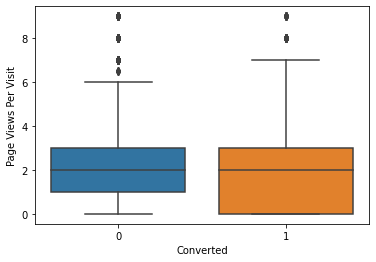

In [1307]:
#4d(ii) "Page Views Per Visit" VS "Converted"
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leadscore)
plt.show()

#### Insight
As the median of not-converted (0) and converted (1) are same, nothing can be correlated

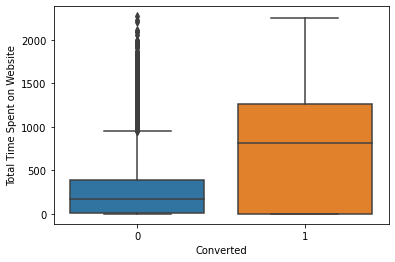

In [1308]:
# 4d(iii) "Total Time Spent on Website" VS "Converted"
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leadscore)
plt.show()

#### Insight
- The convertion rate for total time spent on the website is more (i.e. Leads spending more time on the website are more likely to be converted.)

#### 4e. Analysis of Categorical variables VS Target variable

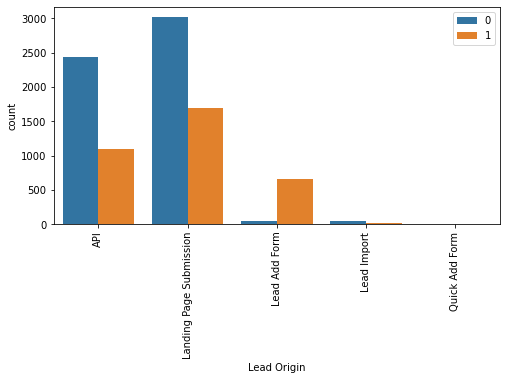

In [1309]:
#4e(i) lead Origin VS Converted
plt.figure(figsize=(8,4))
c1=sns.countplot(leadscore['Lead Origin'], hue=leadscore.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.legend (loc='upper right')
plt.show()

#### Insights
- Most leads were originated from Landing page submission followed by API and their conversion rate seems good.
- Conversion rate on Lead add form is higher than API & landing page submission but the count is very less.

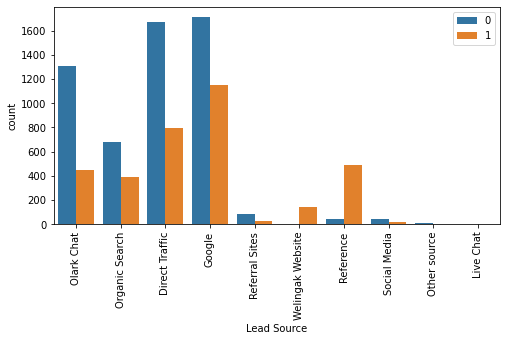

In [1310]:
# 4e(ii) lead Source VS Converted
plt.figure(figsize=(8,4))
c1=sns.countplot(leadscore['Lead Source'], hue=leadscore.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.legend (loc='upper right')
plt.show()

#### Insights
- Conversion Rate of reference leads and leads through welingak website is high.
- Maximum lead sources are generated via Google followed by direct traffic.

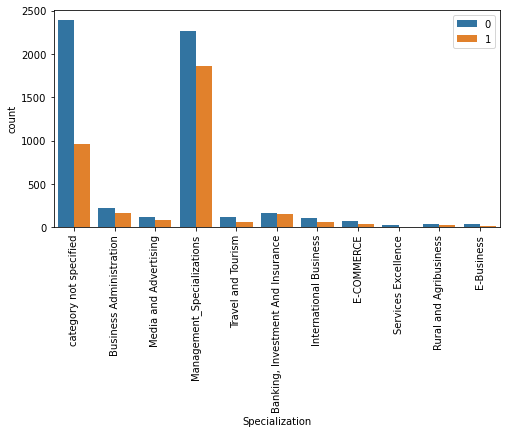

In [1311]:
# 4e(iii) Specialization VS Converted
plt.figure(figsize=(8,4))
c1=sns.countplot(leadscore['Specialization'], hue=leadscore.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.legend (loc='upper right')
plt.show()

#### Insight
- Leads with Management specialization has the highest conversion rate.

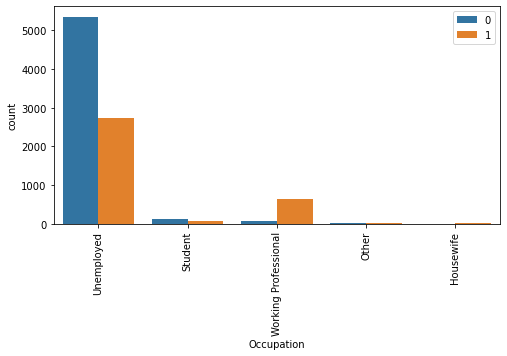

In [1312]:
# 4e(iv) Occupation VS Converted
plt.figure(figsize=(8,4))
c1=sns.countplot(leadscore['Occupation'], hue=leadscore.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.legend (loc='upper right')
plt.show()

#### Insight
- Working professional opting for the course have high probability of enrolling.

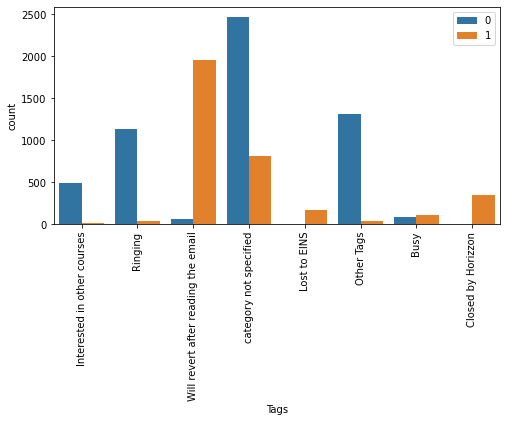

In [1313]:
# 4e(v) Tags VS Converted
plt.figure(figsize=(8,4))
c1=sns.countplot(leadscore['Tags'], hue=leadscore.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.legend (loc='upper right')
plt.show()

#### Insights
- The current status of the lead "Will revert after reading the email" has the maximum probability of lead conversion followed by "Closed by Horizon"

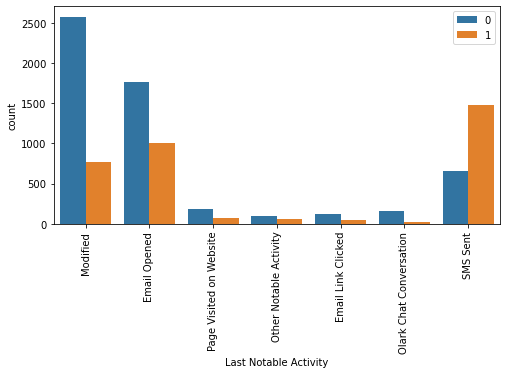

In [1314]:
# 4e(vi) Last Notable Activity VS Converted
plt.figure(figsize=(8,4))
c1=sns.countplot(leadscore['Last Notable Activity'], hue=leadscore.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.legend (loc='upper right')
plt.show()

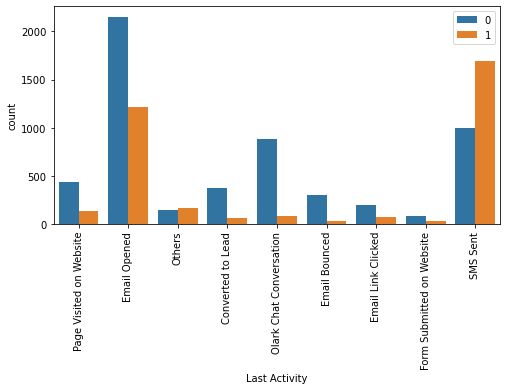

In [1315]:
# 4e(vii) Last Activity VS Converted
plt.figure(figsize=(8,4))
c1=sns.countplot(leadscore['Last Activity'], hue=leadscore.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.legend (loc='upper right')
plt.show()

#### Insights for both last activity and last notable activity
- After knowing about the course, the next actions were sending SMS and opening the emails which constitue the maximum lead conversion

In [1316]:
leadscore.shape

(9015, 15)

## 5. Creation of Dummy variables

In [1317]:
leadscore.nunique().sort_values()

Do Not Email                      2
Converted                         2
Free Copy                         2
Lead Origin                       5
Occupation                        5
City                              6
Last Notable Activity             7
Tags                              8
Last Activity                     9
Lead Source                      10
Specialization                   11
TotalVisits                      14
Page Views Per Visit             46
Total Time Spent on Website    1715
Lead Number                    9015
dtype: int64

#### 5a. We will convert Yes = 1 and No = 0 for both these binary categorical variables

In [1318]:
leadscore['Do Not Email'] = leadscore['Do Not Email'].map({'Yes': 1, "No": 0})
leadscore['Free Copy'] = leadscore['Free Copy'].map({'Yes': 1, "No": 0})

In [1319]:
leadscore['Free Copy'].value_counts()

0    6259
1    2756
Name: Free Copy, dtype: int64

#### 5b. Create dummy variables for categorical variables

In [1320]:
d1 = pd.get_dummies(leadscore[['Lead Origin', 'Occupation', 'Last Notable Activity', 'Specialization', 'Lead Source', 'Tags', 'City', 'Last Activity']],drop_first=True)

# Merge all the dataframes to the original data
leadscore = pd.concat([leadscore, d1], axis=1)

In [1321]:
# Dropping string columns
leadscore.drop(['Lead Origin', 'Occupation', 'Last Notable Activity', 'Specialization', 'Lead Source', 'Tags', 'City', 'Last Activity'], axis = 1, inplace = True)

In [1322]:
leadscore.head(4)

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_category not specified,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_category not specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [1323]:
# Dropping low frequency dummy variables which will not impact model building
leadscore.drop(['Last Notable Activity_Other Notable Activity', 'Specialization_category not specified', 
                'Lead Source_Other source', 'Tags_category not specified', 'Last Activity_Others'], axis = 1, inplace = True)

In [1324]:
leadscore.shape

(9015, 55)

In [1325]:
leadscore.describe()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
count,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000
mean,617192.299612,0.077759,0.384027,3.039712,481.554187,2.250274,0.305713,0.522573,0.079312,0.006101,0.000111,0.001553,0.022851,0.897615,0.076872,0.307377,0.370937,0.019967,0.029174,0.236495,0.043261,0.006212,0.011869,0.019079,0.458458,0.021852,0.007432,0.004104,0.020410,0.317471,0.000222,0.194121,0.118469,0.059013,0.012867,0.006323,0.015752,0.038048,0.055907,0.018857,0.149861,0.129229,0.224182,0.073988,0.049251,0.040266,0.079645,0.007987,0.035940,0.029063,0.373821,0.012313,0.106933,0.062341,0.298724
std,23405.507217,0.267807,0.486391,2.668584,546.372743,1.875720,0.460734,0.499518,0.270240,0.077874,0.010532,0.039379,0.149436,0.303171,0.266403,0.461432,0.483083,0.139894,0.168302,0.424953,0.203456,0.078575,0.108303,0.136811,0.498299,0.146210,0.085893,0.063937,0.141407,0.465518,0.014894,0.395544,0.323181,0.235662,0.112709,0.079269,0.124520,0.191322,0.229754,0.136029,0.356955,0.335472,0.417066,0.261766,0.216404,0.196594,0.270758,0.089016,0.186151,0.167992,0.483844,0.110284,0.309045,0.241786,0.457724
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.000000,0.000000,0.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

## 4. Train - Test Split

In [1326]:
# Putting feature variable to X
X = leadscore.drop(['Converted'], 1)
X.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,660727,0,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,660681,0,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [1327]:
# Putting response variable to y
y = leadscore['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1328]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 5. Feature Scaling

In [1329]:
# Scale the three numeric features
scaler = StandardScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
6804,597599,1,-0.016875,-0.785601,-0.404001,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6592,599192,0,-0.016875,0.106052,-0.404001,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4921,612761,0,-0.390500,-0.572778,-0.135630,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9224,579753,0,0.356749,-0.049896,0.937854,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5678,606475,0,-0.016875,-0.229694,0.401112,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


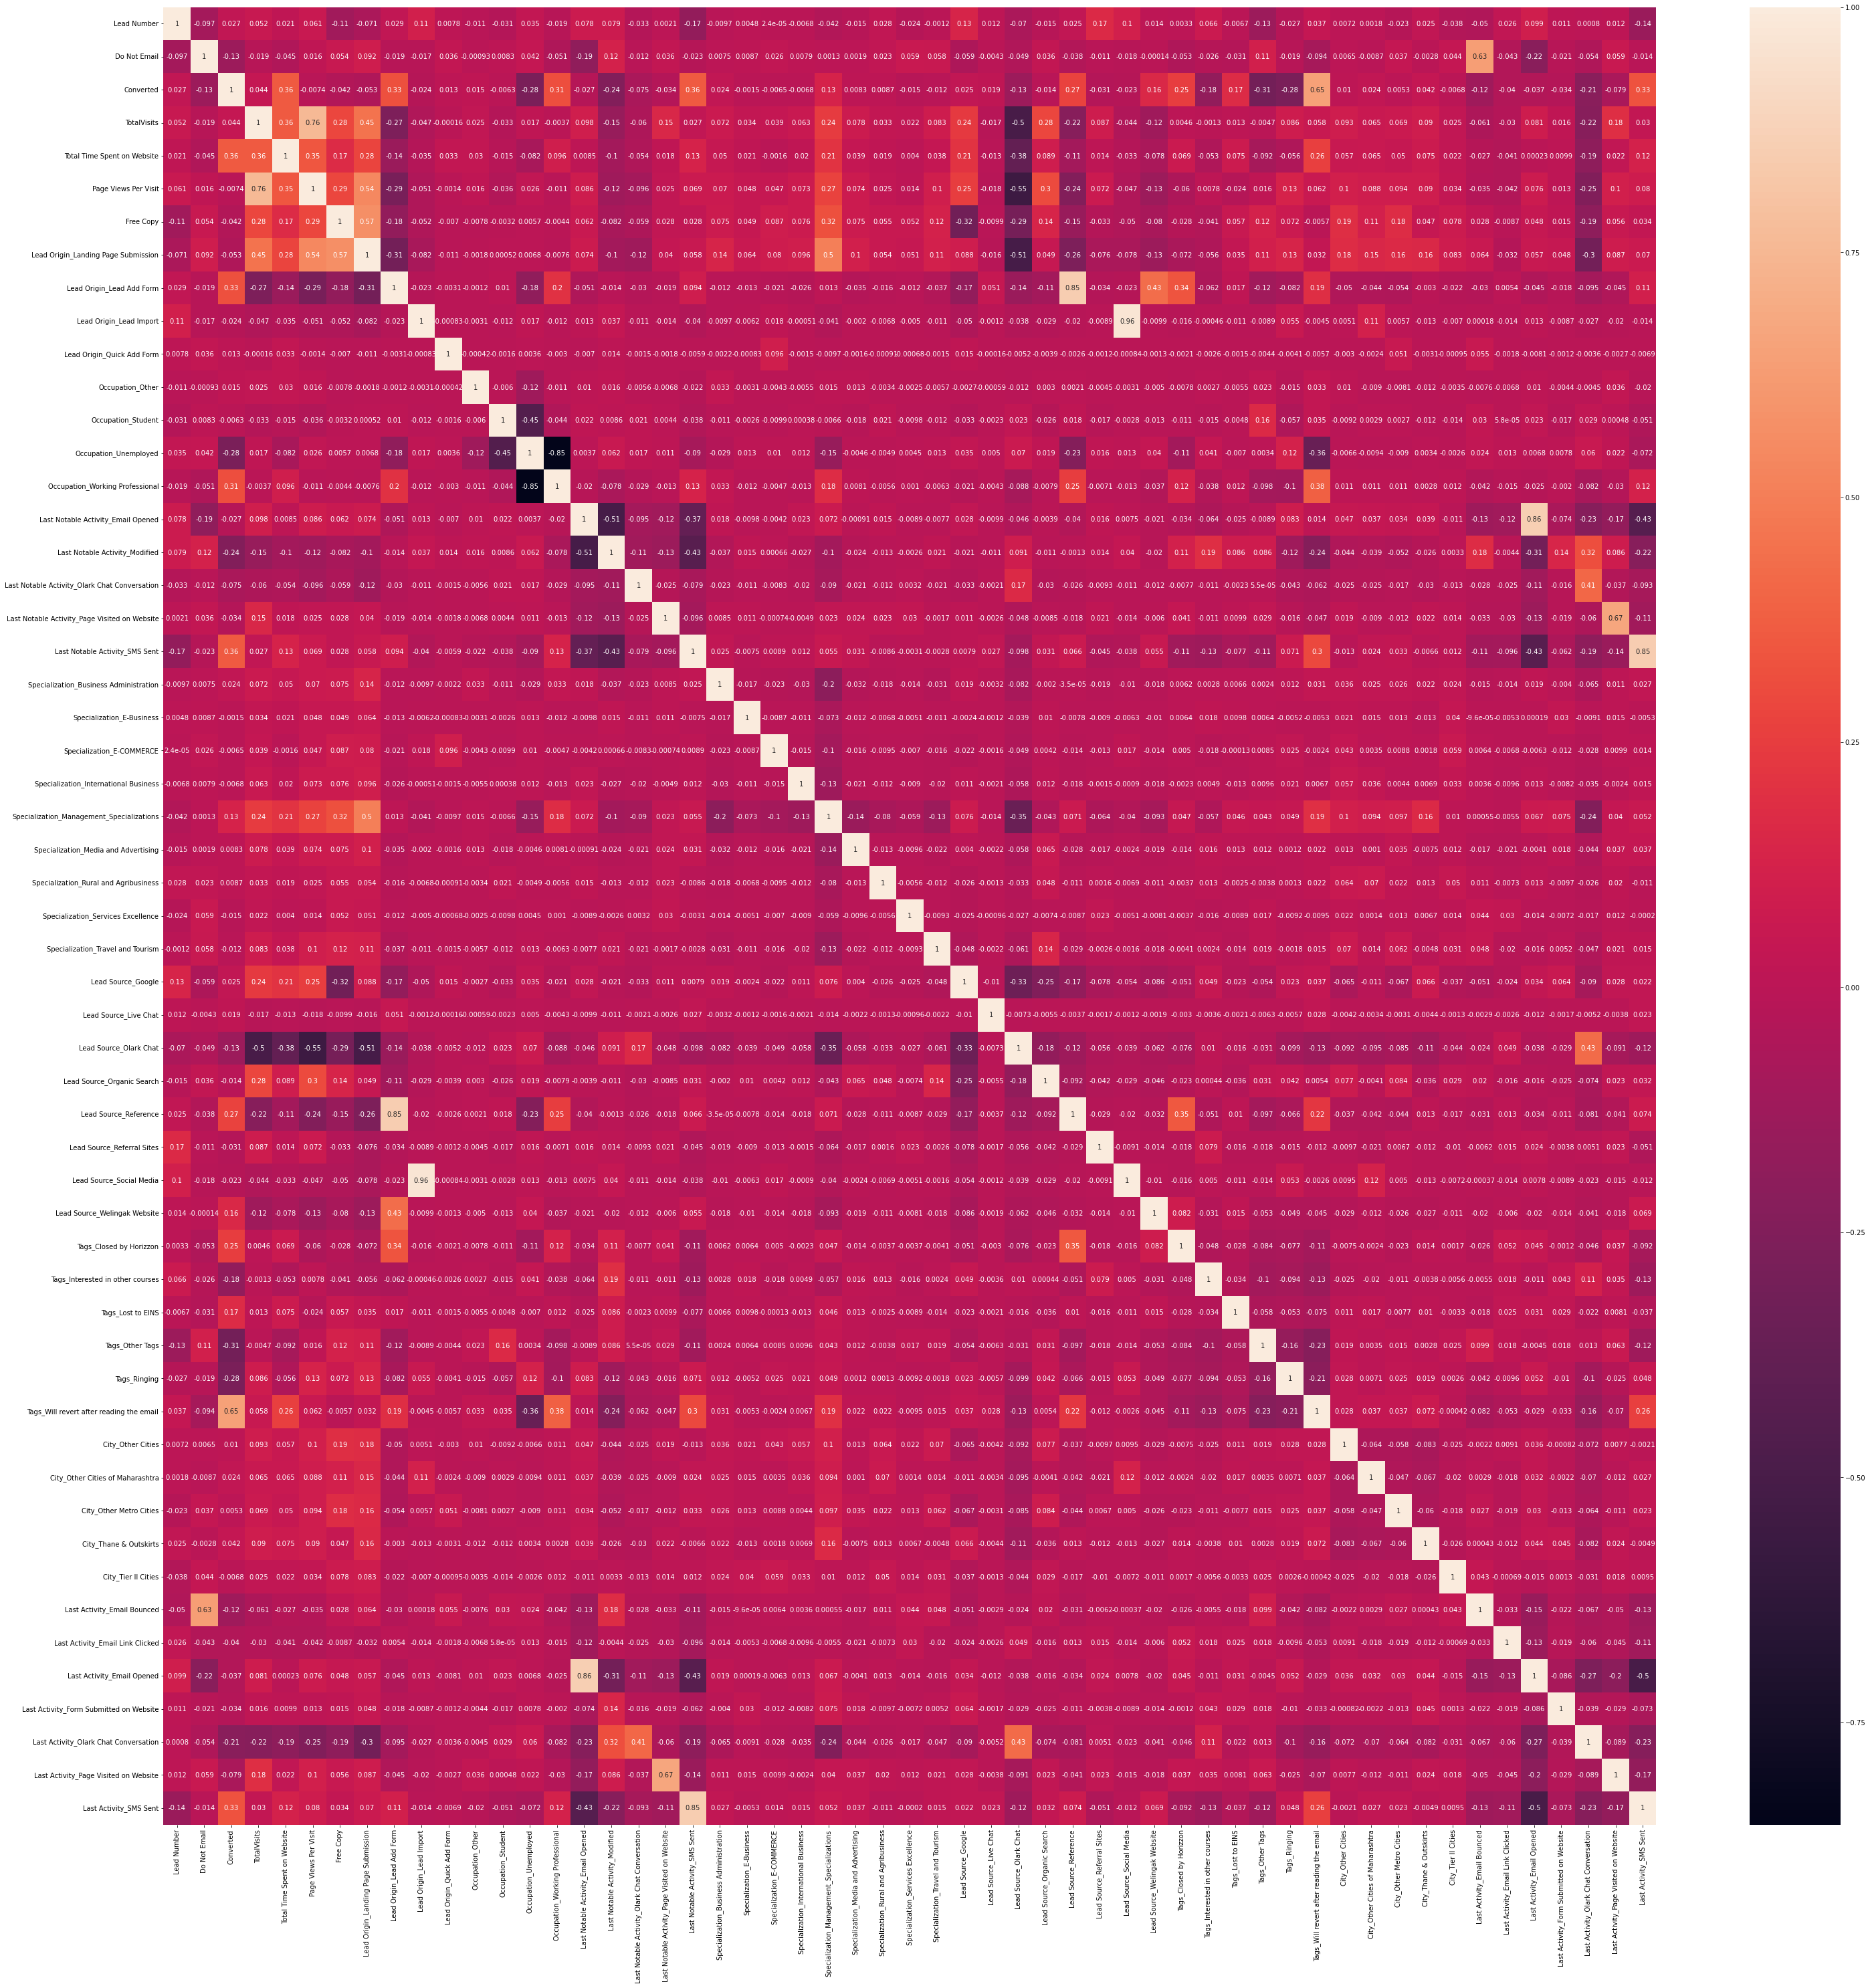

In [1330]:
# Looking at the correlation matrix 
plt.figure(figsize = (50,50))
sns.heatmap(leadscore.corr(),annot = True)
plt.show()

## 6. Model Building

In [1331]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6256
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1213.5
Date:                Sat, 21 Jan 2023   Deviance:                       2426.9
Time:                        20:25:53   Pearson chi2:                 1.00e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6114
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            13.2082   1.47e+04      0.001      0.999   -2.88e+04    2.88e+04
Lead Number                                    7.429e-06   2.52e-06      2.943      0.003    2.48e-06    1.24e-05
Do Not Email                                     -0.5502      0.285     -1.930      0.054      -1.109       0.009
TotalVisits                                       0.2440      0.085      2.870      0.004       0.077       0.411
Total Time Spent on Website                       1.0795      0.063     17.049      0.000       0.955       1.204
Page Views Per Visit                             -0.2163      0.096     -2.263      0.024      -0.404      -0.029
Free Copy                                        -0.1316      0.180     -0.731      0.465      -0.484       0.221
Lead Origin_Landing Page Submission              -0.3530      0.211     -1.675      0.094      -0.766       0.060
Lead Origin_Lead Add Form                         3.1649      0.804      3.936      0.000       1.589       4.741
Lead Origin_Lead Import                          -2.7458      6.355     -0.432      0.666     -15.202       9.711
Lead Origin_Quick Add Form                    -8.774e-09   2.01e-05     -0.000      1.000   -3.95e-05    3.94e-05
Occupation_Other                                -18.4337   1.47e+04     -0.001      0.999   -2.88e+04    2.88e+04
Occupation_Student                              -19.0024   1.47e+04     -0.001      0.999   -2.88e+04    2.88e+04
Occupation_Unemployed                           -19.4769   1.47e+04     -0.001      0.999   -2.88e+04    2.88e+04
Occupation_Working Professional                 -18.4342   1.47e+04     -0.001      0.999   -2.88e+04    2.88e+04
Last Notable Activity_Email Opened               -0.2692      0.475     -0.566      0.571      -1.201       0.663
Last Notable Activity_Modified                   -1.1420      0.410     -2.785      0.005      -1.946      -0.338
Last Notable Activity_Olark Chat Conversation    -0.7914      0.635     -1.246      0.213      -2.036       0.453
Last Notable Activity_Page Visited on Website    -0.3175      0.630     -0.504      0.614      -1.552       0.917
Last Notable Activity_SMS Sent                    1.3293      0.464      2.867      0.004       0.421       2.238
Specialization_Business Administration           -0.0452      0.325     -0.139      0.889      -0.682       0.591
Specialization_E-Business                        -0.0378      0.697     -0.054      0.957      -1.404       1.328
Specialization_E-COMMERCE                        -0.1445      0.556     -0.260      0.795      -1.233       0.944
Specialization_International Business            -0.3803      0.443     -0.858      0.391      -1.249       0.488
Speci

## 6. Feature Selection Using RFE

In [1332]:
# Logistic Regression
logreg = LogisticRegression()

In [1333]:
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [1334]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True])

In [1335]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', False, 6),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 30),
 ('Free Copy', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Origin_Quick Add Form', False, 40),
 ('Occupation_Other', False, 32),
 ('Occupation_Student', False, 23),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Last Notable Activity_Email Opened', False, 9),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', False, 14),
 ('Last Notable Activity_Page Visited on Website', False, 17),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 33),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 26),
 ('Specialization_International Business', False, 27),
 ('Specializ

In [1336]:
# Selected Variables
col = X_train.columns[rfe.support_]
col

Index(['Lead Number', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Lead Source_Olark Chat', 'Lead Source_Reference', 'Tags_Other Tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent'],
      dtype='object')

In [1337]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free Copy',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Occupation_Other', 'Occupation_Student',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_

##### Assessing the model with StatsModels

In [1338]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1610.2
Date:                Sat, 21 Jan 2023   Deviance:                       3220.4
Time:                        20:25:54   Pearson chi2:                 1.37e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5593
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6512      1.327     -1.244      0.214      -4.253       0.951
Lead Number                               1.629e-06   2.03e-06      0.801      0.423   -2.35e-06    5.61e-06
Total Time Spent on Website                  1.0617      0.053     20.203      0.000       0.959       1.165
Lead Origin_Landing Page Submission         -0.0973      0.118     -0.821      0.411      -0.330       0.135
Lead Origin_Lead Add Form                    4.7084      0.449     10.478      0.000       3.828       5.589
Occupation_Unemployed                       -0.6561      0.375     -1.751      0.080      -1.390       0.078
Occupation_Working Professional              1.0022      0.444      2.256      0.024       0.132       1.873
Last Notable Activity_Modified              -0.5951      0.115     -5.196      0.000      -0.820      -0.371
Last Notable Activity_SMS Sent               1.5572      0.224      6.942      0.000       1.118       1.997
Lead Source_Olark Chat                       1.0139      0.153      6.607      0.000       0.713       1.315
Lead Source_Reference                       -1.1362      0.499     -2.276      0.023      -2.114      -0.158
Tags_Other Tags                             -2.9644      0.217    -13.662      0.000      -3.390      -2.539
Tags_Ringing                                -4.0161      0.269    -14.950      0.000      -4.543      -3.490
Tags_Will revert after reading the email     3.5237      0.170     20.761      0.000       3.191       3.856
Last Activity_Olark Chat Conversation       -1.2514      0.197     -6.364      0.000      -1.637      -0.866
Last Activity_SMS Sent                       0.4367      0.186      2.352      0.019       0.073       0.801
============================================================================================================
"""

In [1339]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6804    0.094055
6592    0.833788
4921    0.128183
9224    0.108301
5678    0.103562
7919    0.740980
4719    0.611720
5806    0.943301
874     0.978619
7954    0.117282
dtype: float64

In [1340]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09405463, 0.83378838, 0.1281827 , 0.10830088, 0.1035624 ,
       0.74098003, 0.61172015, 0.94330103, 0.97861924, 0.11728219])

In [1341]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,404.07
12,Occupation_Unemployed,360.83
13,Occupation_Working Professional,31.86
14,Last Notable Activity_Email Opened,19.77
7,Lead Origin_Lead Add Form,19.28
15,Last Notable Activity_Modified,17.03
18,Last Notable Activity_SMS Sent,15.74
32,Lead Source_Reference,15.58
34,Lead Source_Social Media,14.27
8,Lead Origin_Lead Import,14.27


In [1342]:
# Predictions on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.09405463, 0.83378838, 0.1281827 , ..., 0.21815766, 0.08644778,
       0.00233532])

##### Creating a new column Predicted with 1 if Probability > 0.5

In [1343]:
#Creating the DataFrame with Actual Converted and Predicted Probabilities
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conversion_Prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.094055,6804
1,0,0.833788,6592
2,0,0.128183,4921
3,0,0.108301,9224
4,0,0.103562,5678


In [1344]:
# Creating a new column Predicted with values which have Probability greater than 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted
0,0,0.094055,6804,0
1,0,0.833788,6592,1
2,0,0.128183,4921,0
3,0,0.108301,9224,0
4,0,0.103562,5678,0


In [1345]:
# Accuracy.
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted))

0.8985736925515055


In [1346]:
# Dropping the variables with p-values greater than 0.05
col = col.drop(['Lead Origin_Landing Page Submission', 'Occupation_Unemployed'])
col

Index(['Lead Number', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Lead Source_Olark Chat', 'Lead Source_Reference', 'Tags_Other Tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent'],
      dtype='object')

In [1347]:
# Model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1612.0
Date:                Sat, 21 Jan 2023   Deviance:                       3224.0
Time:                        20:25:55   Pearson chi2:                 1.37e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5590
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.4220      1.261     -1.920      0.055      -4.894       0.050
Lead Number                               1.717e-06   2.02e-06      0.849      0.396   -2.25e-06    5.68e-06
Total Time Spent on Website                  1.0606      0.052     20.202      0.000       0.958       1.163
Lead Origin_Lead Add Form                    4.7678      0.442     10.787      0.000       3.901       5.634
Occupation_Working Professional              1.6342      0.254      6.424      0.000       1.136       2.133
Last Notable Activity_Modified              -0.5833      0.114     -5.106      0.000      -0.807      -0.359
Last Notable Activity_SMS Sent               1.5702      0.224      7.007      0.000       1.131       2.009
Lead Source_Olark Chat                       1.0742      0.131      8.194      0.000       0.817       1.331
Lead Source_Reference                       -1.1240      0.499     -2.253      0.024      -2.102      -0.146
Tags_Other Tags                             -2.9303      0.215    -13.611      0.000      -3.352      -2.508
Tags_Ringing                                -4.0262      0.268    -15.009      0.000      -4.552      -3.500
Tags_Will revert after reading the email     3.5409      0.169     20.938      0.000       3.209       3.872
Last Activity_Olark Chat Conversation       -1.2458      0.196     -6.358      0.000      -1.630      -0.862
Last Activity_SMS Sent                       0.4156      0.185      2.244      0.025       0.053       0.779
============================================================================================================
"""

In [1348]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6804    0.097158
6592    0.842477
4921    0.121590
9224    0.112757
5678    0.099062
7919    0.745883
4719    0.619870
5806    0.942089
874     0.977720
7954    0.110978
dtype: float64

In [1349]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09715844, 0.84247741, 0.12158956, 0.11275694, 0.09906179,
       0.74588267, 0.61986958, 0.942089  , 0.97772009, 0.11097786])

In [1350]:
# Making a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,404.07
12,Occupation_Unemployed,360.83
13,Occupation_Working Professional,31.86
14,Last Notable Activity_Email Opened,19.77
7,Lead Origin_Lead Add Form,19.28
15,Last Notable Activity_Modified,17.03
18,Last Notable Activity_SMS Sent,15.74
32,Lead Source_Reference,15.58
34,Lead Source_Social Media,14.27
8,Lead Origin_Lead Import,14.27


In [1351]:
# Predictions on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.09715844, 0.84247741, 0.12158956, ..., 0.21782624, 0.08855604,
       0.00245776])

In [1352]:
#Creating the DataFrame with Actual Converted and Predicted Probabilities
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conversion_Prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.097158,6804
1,0,0.842477,6592
2,0,0.121590,4921
3,0,0.112757,9224
4,0,0.099062,5678


In [1353]:
# Creating a new column Predicted with values which have Probability greater than 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted
0,0,0.097158,6804,0
1,0,0.842477,6592,1
2,0,0.121590,4921,0
3,0,0.112757,9224,0
4,0,0.099062,5678,0


In [1354]:
# Accuracy.
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted))

0.8987321711568939


#### Insights 
Comparing Model 2 & Model 3, the accuracy is similar

In [1355]:
# Confusion matrix again 
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted)
confusion

array([[3663,  239],
       [ 400, 2008]], dtype=int64)

#### Metrics beyond simply accuracy

In [1356]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1357]:
# Sensitivity of the logistic regression model
TP / float(TP+FN)

0.8338870431893688

In [1358]:
# Calculate specificity
TN / float(TN+FP)

0.9387493593029216

In [1359]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.061250640697078425


In [1360]:
# positive predictive value 
print (TP / float(TP+FP))

0.8936359590565198


In [1361]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9015505783903519


## 7. Plotting the ROC Curve

In [1362]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1363]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob,
                                         drop_intermediate = False)

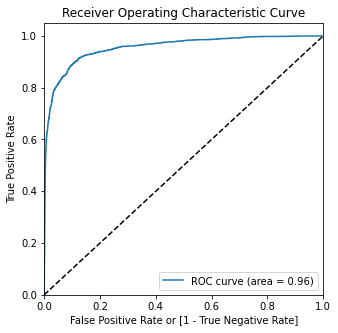

In [1364]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## 8. Finding Optimal Cut-off Points

In [1365]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.097158,6804,0,1,0,0,0,0,0,0,0,0,0
1,0,0.842477,6592,1,1,1,1,1,1,1,1,1,1,0
2,0,0.121590,4921,0,1,1,0,0,0,0,0,0,0,0
3,0,0.112757,9224,0,1,1,0,0,0,0,0,0,0,0
4,0,0.099062,5678,0,1,0,0,0,0,0,0,0,0,0


In [1366]:
# Calculat accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381616     1.000000     0.000000
0.1   0.1  0.762758     0.967608     0.636340
0.2   0.2  0.863233     0.932724     0.820349
0.3   0.3  0.895404     0.891611     0.897745
0.4   0.4  0.896672     0.864618     0.916453
0.5   0.5  0.898732     0.833887     0.938749
0.6   0.6  0.898574     0.800664     0.958995
0.7   0.7  0.882726     0.734635     0.974116
0.8   0.8  0.869731     0.687292     0.982317
0.9   0.9  0.849128     0.619186     0.991030


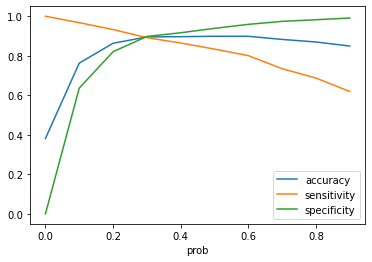

In [1367]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### Insight
From the curve above, we can see that 0.3 is our Optimal Point

In [1368]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.097158,6804,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.842477,6592,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.121590,4921,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.112757,9224,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.099062,5678,0,1,0,0,0,0,0,0,0,0,0,0


In [1369]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted))

0.8954041204437401


In [1370]:
# Confusion matrix again 
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted)
confusion

array([[3503,  399],
       [ 261, 2147]], dtype=int64)

In [1371]:
# Metrics beyond Simple Accuracy with 0.3 as Optimal Cutoff point

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1372]:
# Sensitivity of the logistic regression model
TP / float(TP+FN)

0.8916112956810631

In [1373]:
# Calculate specificity
TN / float(TN+FP)

0.897744746283957

In [1374]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.10225525371604305


In [1375]:
# positive predictive value 
print (TP / float(TP+FP))

0.8432835820895522


In [1376]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9306588735387885


## 9. Precision and Recall

In [1377]:
# Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8432835820895522

In [1378]:
# Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8916112956810631

#### Precision and recall tradeoff

In [1379]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

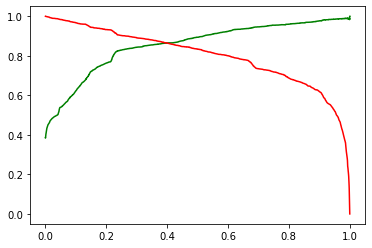

In [1380]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 10. Making Predictions on the Test Set

In [1381]:
# Scaling the Numerical Variables
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [1382]:
X_test = X_test[col]
X_test.head()

,Lead Number,Total Time Spent on Website,Lead Origin_Lead Add Form,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Lead Source_Olark Chat,Lead Source_Reference,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
2781,632943,-0.884673,0,0,1,0,1,0,0,0,0,0,0
8231,587079,-0.827798,0,0,0,1,0,0,0,1,0,0,1
1721,642635,1.792119,0,0,0,0,0,0,0,0,1,0,0
5226,609701,-0.802113,0,0,1,0,0,0,0,0,0,0,0
4912,612838,-0.242537,0,0,1,0,0,0,0,0,0,1,0


In [1383]:
X_test_sm = sm.add_constant(X_test)

In [1384]:
# Predictions on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

2781    0.143975
8231    0.012966
1721    0.984060
5226    0.056827
4912    0.030586
dtype: float64

In [1385]:
# Converting y_pred to a DataFrame
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2781,0.143975
8231,0.012966
1721,0.984060
5226,0.056827
4912,0.030586


In [1386]:
# Converting y_test to DataFrame
y_test_df = pd.DataFrame(y_test)

In [1387]:
# Using 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [1388]:
# Removing index for both DataFrames to concatenate them side by side
y_pred_1.reset_index(drop= True, inplace= True)
y_test_df.reset_index(drop= True, inplace= True)

In [1389]:
# Concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2781,0.143975
1,0,8231,0.012966
2,1,1721,0.984060
3,0,5226,0.056827
4,0,4912,0.030586


In [1390]:
# Renaming the 0 column
y_pred_final = y_pred_final.rename(columns = {0: 'Conversion_Prob'})

In [1391]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Conversion_Prob']]
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob
0,2781,0,0.143975
1,8231,0,0.012966
2,1721,1,0.984060
3,5226,0,0.056827
4,4912,0,0.030586


In [1392]:
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Final_Predicted
0,2781,0,0.143975,0
1,8231,0,0.012966,0
2,1721,1,0.984060,1
3,5226,0,0.056827,0
4,4912,0,0.030586,0


In [1393]:
# Overall Accuracy
metrics.accuracy_score(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)

0.9031423290203328

In [1394]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)
confusion2

array([[1500,  151],
       [ 111,  943]], dtype=int64)

In [1395]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [1396]:
# Sensitivity of the logistic regression model
TP / float(TP+FN)

0.8946869070208728

In [1397]:
# Calculate specificity
TN / float(TN+FP)

0.9085402786190188

In [1398]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.09145972138098123


In [1399]:
# positive predictive value 
print (TP / float(TP+FP))

0.8619744058500914


In [1400]:
# Negative predictive value
print (TN / float(TN+ FN))

0.931098696461825


## 11. Assigning the Lead Score to the data

In [1401]:
leads = leadscore
leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [1402]:
# Scaling the numerical variables
leads[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(leads[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [1403]:
# Removing all the variables which were not in our final model
leads = leads[col]
leads = sm.add_constant(leads)
leads.head()

,const,Lead Number,Total Time Spent on Website,Lead Origin_Lead Add Form,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Lead Source_Olark Chat,Lead Source_Reference,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
0,1.0,660737,-0.884673,0,0,1,0,1,0,0,0,0,0,0
1,1.0,660728,0.351898,0,0,0,0,0,0,0,1,0,0,0
2,1.0,660727,1.926050,0,0,0,0,0,0,0,0,1,0,0
3,1.0,660719,-0.325097,0,0,1,0,0,0,0,1,0,0,0
4,1.0,660681,1.735244,0,0,1,0,0,0,0,0,1,0,0


In [1404]:
# Making predictions
leads_score_pred = res.predict(leads)
leads_score_pred.head()

0    0.149957
1    0.007099
2    0.986559
3    0.001942
4    0.970977
dtype: float64

In [1405]:
leads['Lead Score'] = round(leads_score_pred*100)
leads.head()

,const,Lead Number,Total Time Spent on Website,Lead Origin_Lead Add Form,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Lead Source_Olark Chat,Lead Source_Reference,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Score
0,1.0,660737,-0.884673,0,0,1,0,1,0,0,0,0,0,0,15.0
1,1.0,660728,0.351898,0,0,0,0,0,0,0,1,0,0,0,1.0
2,1.0,660727,1.926050,0,0,0,0,0,0,0,0,1,0,0,99.0
3,1.0,660719,-0.325097,0,0,1,0,0,0,0,1,0,0,0,0.0
4,1.0,660681,1.735244,0,0,1,0,0,0,0,0,1,0,0,97.0


In [1406]:
# Adding Lead Number to see which Lead has scored how much
leads['Lead Number'] = Lead_Number
leads.head()

,const,Lead Number,Total Time Spent on Website,Lead Origin_Lead Add Form,Occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Lead Source_Olark Chat,Lead Source_Reference,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Score
0,1.0,660737,-0.884673,0,0,1,0,1,0,0,0,0,0,0,15.0
1,1.0,660728,0.351898,0,0,0,0,0,0,0,1,0,0,0,1.0
2,1.0,660727,1.926050,0,0,0,0,0,0,0,0,1,0,0,99.0
3,1.0,660719,-0.325097,0,0,1,0,0,0,0,1,0,0,0,0.0
4,1.0,660681,1.735244,0,0,1,0,0,0,0,0,1,0,0,97.0


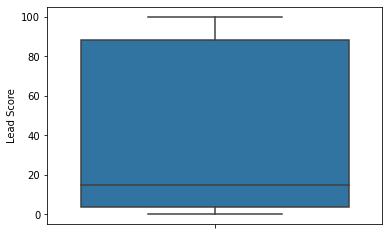

In [1407]:
# Plotting Boxplot to check the distribution for the Lead Scores calculated
sns.boxplot(y = leads['Lead Score'])
plt.show()